# K-Nearest Neighbors

Determinar o tipo de vidro a partir de suas propriedades físico-quimicas

Dataset obtido no Kaggle (https://www.kaggle.com/uciml/glass)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('glass.csv')

In [3]:
dados.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


RI -> indice de refração

Na, Mg, Al, Si, K, Ca, Ba Fe -> quantidade de sódio, magnésio, alumínio, silicone, potássio, cálcio, bário e ferro

Type -> tipo de vidro

Verificando os tipos de vidros presentes na amostra

In [4]:
dados['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
classes = dados['Type'].unique()
n_classes = len(classes)

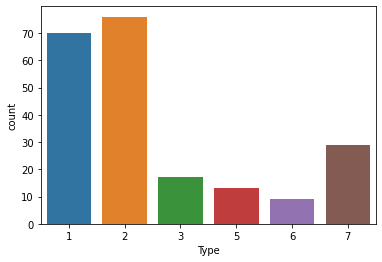

In [6]:
sns.countplot(x='Type',data=dados)

Verificando a distribuição de cada elemento

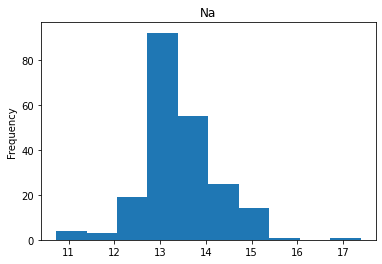

In [7]:
dados['Na'].plot(kind='hist',title='Na')

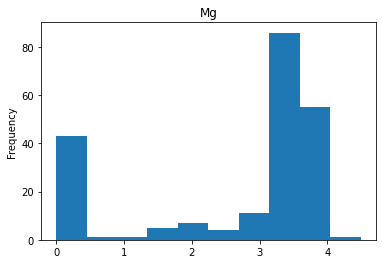

In [8]:
dados['Mg'].plot(kind='hist',title='Mg')

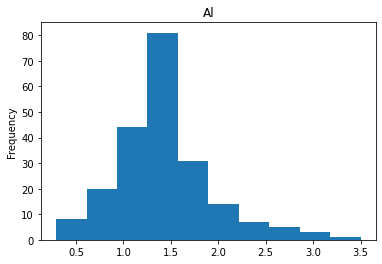

In [9]:
dados['Al'].plot(kind='hist',title='Al')

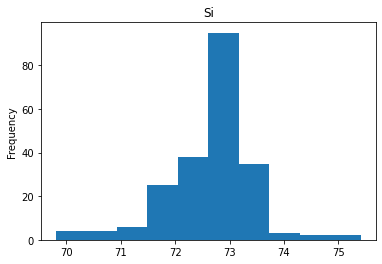

In [10]:
dados['Si'].plot(kind='hist',title='Si')

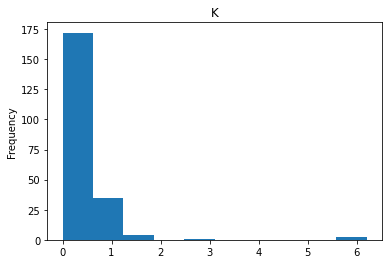

In [11]:
dados['K'].plot(kind='hist',title='K')

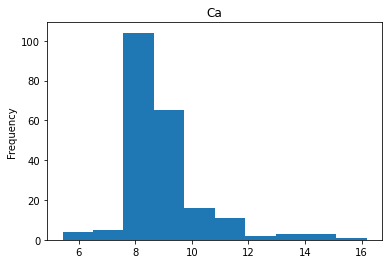

In [12]:
dados['Ca'].plot(kind='hist',title='Ca')

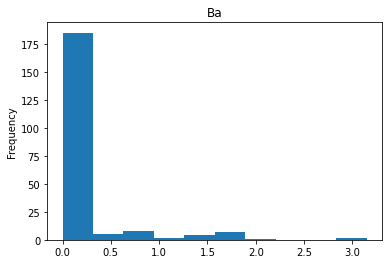

In [13]:
dados['Ba'].plot(kind='hist',title='Ba')

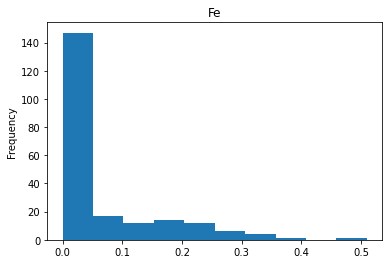

In [14]:
dados['Fe'].plot(kind='hist',title='Fe')

Verificando distribuição do índice de refração

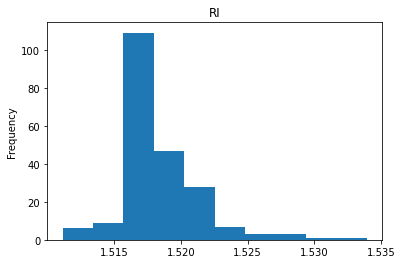

In [15]:
dados['RI'].plot(kind='hist',title='RI')

Verificando a exitência de NaNs e nulos

In [16]:
dados.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [17]:
dados.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Verifica-se que não existem NaNs ou nulos

Observando os valores de cada variável, notamos que o processo de normalização não parece ser necessário. 

Separando as variáveis X e Y

In [18]:
X = dados.drop('Type',axis=1).values
Y = dados['Type'].values

In [19]:
from sklearn.preprocessing import label_binarize

In [20]:
Y = label_binarize(Y, classes=classes)

Criando amostra de treino e teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo KNN

No modelo KNN o número de vizinhos é uma variável de entrada. Para melhor determinar este número, iremos cacular a acurácia no intervalo entre 1 e 10.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
vizinhos = []
acc_treino = []
acc_teste = []
std = []

In [25]:
for i in range(1,11):
    vizinhos.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_treino,Y_treino)
    acc_treino.append(knn.score(X_treino,Y_treino))
    acc_teste.append(knn.score(X_teste,Y_teste))
    Y_previsto = knn.predict(X_teste)
    std.append(np.std(Y_previsto==Y_teste)/np.sqrt(Y_previsto.shape[0]))

Graficando acurácias em função do número de vizinhos

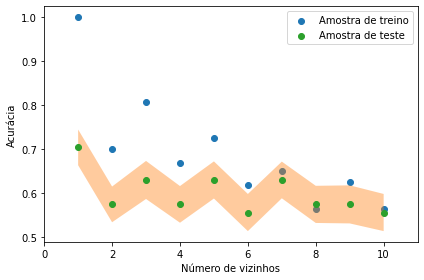

In [26]:
plt.scatter(vizinhos,acc_treino,label='Amostra de treino')
plt.fill_between(range(1,11),np.array(acc_teste)-1*np.array(std),np.array(acc_teste)+1*np.array(std), alpha=0.40)
plt.scatter(vizinhos,acc_teste,label='Amostra de teste')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.xlim([0,11])
plt.legend()
plt.tight_layout()

Observando as acurácias, notamos que k=1 tem o melhor valor, porém, o mesmo estaria superestimando o modelo. Desta forma, iremos adora k=6 por ter a segunda melhor acurácia na amostra de teste

In [27]:
knn=KNeighborsClassifier(n_neighbors=6)

In [28]:
knn.fit(X_treino,Y_treino)

KNeighborsClassifier(n_neighbors=6)

In [29]:
Y_previsto = knn.predict(X_teste)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm=confusion_matrix(Y_teste.argmax(axis=1),Y_previsto.argmax(axis=1))

In [32]:
cm

array([[11,  3,  0,  0,  0,  0],
       [ 9, 15,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  6]])

In [33]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [34]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1,2,3])
print(cr)

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        14
           1       0.83      0.62      0.71        24
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         2

   micro avg       0.69      0.53      0.60        45
   macro avg       0.34      0.32      0.32        45
weighted avg       0.61      0.53      0.56        45
 samples avg       0.44      0.44      0.44        45



/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-score

In [35]:
f1_macro = f1_score(Y_teste,Y_previsto,average='macro')
print("F1 Macro score = {:0.2f}%".format(f1_macro*100))

f1_wei = f1_score(Y_teste,Y_previsto,average='weighted')
print("F1 Weighted score = {:0.2f}%".format(f1_wei*100))

F1 Macro score = 36.97%
F1 Weighted score = 58.77%


Precision score

In [36]:
precisao_macro = precision_score(Y_teste,Y_previsto,average='macro')
print("Precision Macro score = {:0.2f}%".format(precisao_macro*100))

precisao_wei = precision_score(Y_teste,Y_previsto,average='weighted')
print("Precision Weighted score = {:0.2f}%".format(precisao_wei*100))

Precision Macro score = 39.38%
Precision Weighted score = 63.73%


/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score

In [37]:
rec_macro = recall_score(Y_teste,Y_previsto,average='macro')
print("Recall score Macro = {:0.2f}%".format(rec_macro*100))

rec_wei = recall_score(Y_teste,Y_previsto,average='weighted')
print("Recall score Weighted = {:0.2f}%".format(rec_wei*100))

Recall score Macro = 35.42%
Recall score Weighted = 55.56%


Accuracy score

In [38]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 55.56%


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.multiclass import OneVsRestClassifier

In [40]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_teste[:, i], Y_previsto[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])*100

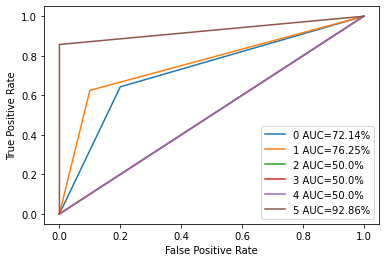

In [41]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=str(i)+' AUC='+str(round(roc_auc[i],2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [42]:
from sklearn.metrics import precision_recall_curve,auc

In [43]:
lr_precision = dict()
lr_recall = dict()
lr_auc = dict()
for i in range(n_classes):
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(Y_teste[:, i], Y_previsto[:, i])
    lr_auc[i] = auc(lr_recall[i], lr_precision[i])*100

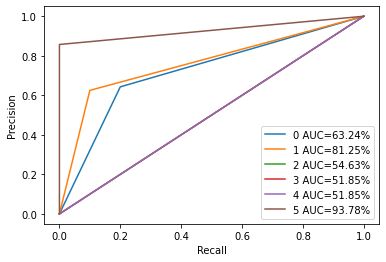

In [44]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=str(i)+' AUC='+str(round(lr_auc[i],2))+"%")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()